# CHURN

Carga de las librerias a ocupar en este notebook.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import itertools

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.preprocessing import KBinsDiscretizer

import seaborn as sns
import matplotlib.pyplot as plt

Configuraciones del Notebook.

In [3]:
pd.set_option("display.max_columns", 200)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

In [4]:
%config InlineBackend.figure_format = 'retina'

#### Lectura de datos

In [5]:
data = pd.read_csv("datasets/churn/churn.csv")
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* 'customerID':'Customer ID'
* 'gender':'Whether the customer is a male or a female'
* 'SeniorCitizen':'Whether the customer is a senior citizen or not (1, 0)'
* 'Partner':'Whetherthe customer has a partner or not (Yes, No)'
* 'Dependents':'Whether the customer has dependents or not (Yes, No)'
* 'tenure':'Number of months the customer has stayed with the
company'
* 'PhoneService':'Whether the customer has a phone service or not (Yes,
No)'
* 'MultipleLines':'Whether the customer has multiple lines or not (Yes,
No, No phone service)'
* 'InternetService':'Customer’s internet service provider (DSL, Fiber
optic, No)'
* 'OnlineSecurity':'Whether the customer has online security or not (Yes,
No, No internet service)'
* 'OnlineBackup':'Whether the customer has online backup or not (Yes,
No, No internet service)'
* 'DeviceProtection':'Whether the customer has device protection or
not (Yes, No, No internet service)'
* 'TechSupport':'Whether the customer has tech support or not (Yes,
No, No internet service)'
* 'StreamingTV':'Whether the customer has streaming TV or not (Yes,
No, No internet service)'
* 'StreamingMovies':'Whether the customer has streaming movies or
not (Yes, No, No internet service)'
* 'Contract':'The contract term of the customer (Month-to-month, One
year, Two year)'
* 'PaperlessBilling':'Whether the customer has paperless billing or not
(Yes, No)'

* 'PaymentMethod':'The customer’s payment method (Electronic
check, Mailed check, Bank transfer (automatic), Credit card
(automatic))'
* 'MonthlyCharges':'The amount charged to the customer monthly'
* 'TotalCharges':'The total amount charged to the customer'
* 'Churn':'Whether the customer churned or not (Yes or No)'

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Análisis Exploratorio

Vista previa de los datos

In [8]:
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3447,9762-YAQAA,Male,0,No,No,39,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,One year,No,Credit card (automatic),81.40,3213.75,No
5261,1409-PHXTF,Male,1,Yes,No,54,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,110.45,6077.75,No
2515,8869-LIHMK,Female,0,No,No,64,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.10,7334.05,No
3971,8515-OCTJS,Female,0,No,No,25,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,692.1,Yes
3893,5816-SCGFC,Female,1,No,No,7,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,51.30,419.35,No
6352,2347-WKKAE,Male,0,Yes,No,42,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,94.40,4014.6,No
3346,2545-EBUPK,Female,1,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.05,186.05,No
756,5730-DBDSI,Male,0,No,No,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,1253.8,No
5689,5399-ZIMKF,Male,0,No,No,5,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.65,383.65,No
5956,3640-PHQXK,Female,0,No,No,31,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,89.90,2806.9,Yes


### Unidad muestral

In [9]:
um = ['customerID']
data[ um ].describe()

,customerID
count,7043
unique,7043
top,7590-VHVEG
freq,1


### Target

In [10]:
data['Churn'] = np.where(data['Churn'] == 'Yes', 1, 0)
data['Churn'].astype(int)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

Churn
0       0.73
1       0.27
Name: proportion, dtype: float64

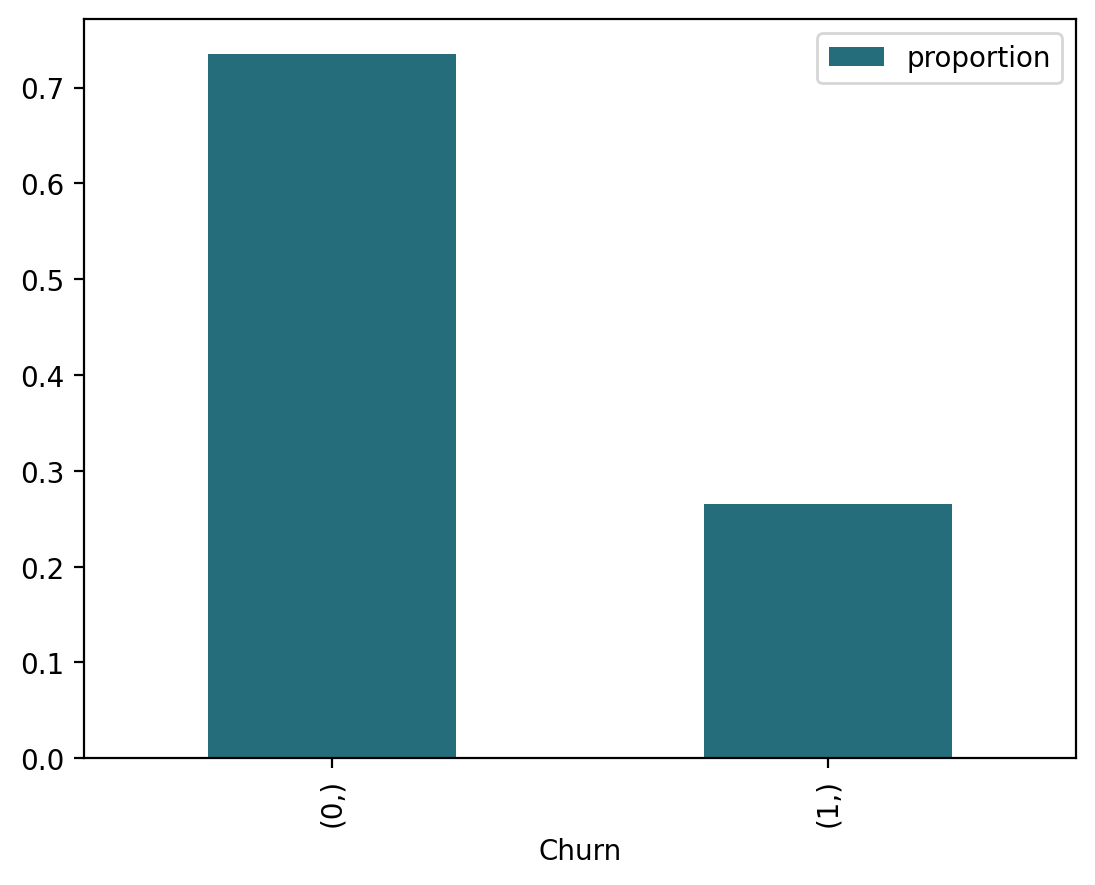

In [11]:
tgt = ['Churn']
data[ tgt ].value_counts(normalize=True).plot(kind='bar', legend=True, color="#256D7B")
data[ tgt ].value_counts(normalize=True)

### Variables continuas (númericas)

In [12]:
data.describe(percentiles=[.01, .25, .50, .75, .99], exclude=['object'])

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,"7,043.00","7,043.00","7,043.00","7,043.00"
mean,0.16,32.37,64.76,0.27
std,0.37,24.56,30.09,0.44
min,0.00,0.00,18.25,0.00
1%,0.00,1.00,19.20,0.00
25%,0.00,9.00,35.50,0.00
50%,0.00,29.00,70.35,0.00
75%,0.00,55.00,89.85,1.00
99%,1.00,72.00,114.73,1.00
max,1.00,72.00,118.75,1.00


Variable __TotalCharges__

In [13]:
data['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

Eliminamos registros sin datos en la variable/columna de __TotalCharges__, se tienen registros con espacios ' '.

In [14]:
data[data['TotalCharges'] == ' '].shape

(11, 21)

In [15]:
print(data.shape)
data = data[data['TotalCharges'] != ' ']
print(data.shape)

(7043, 21)
(7032, 21)


In [16]:
data['TotalCharges'] = data['TotalCharges'].astype('float64')

In [17]:
ls_cont = data.select_dtypes(exclude=['object']).columns.to_list()
ls_cont = [ _ for _ in ls_cont if _ not in ('SeniorCitizen', 'Churn')]
ls_cont

['tenure', 'MonthlyCharges', 'TotalCharges']

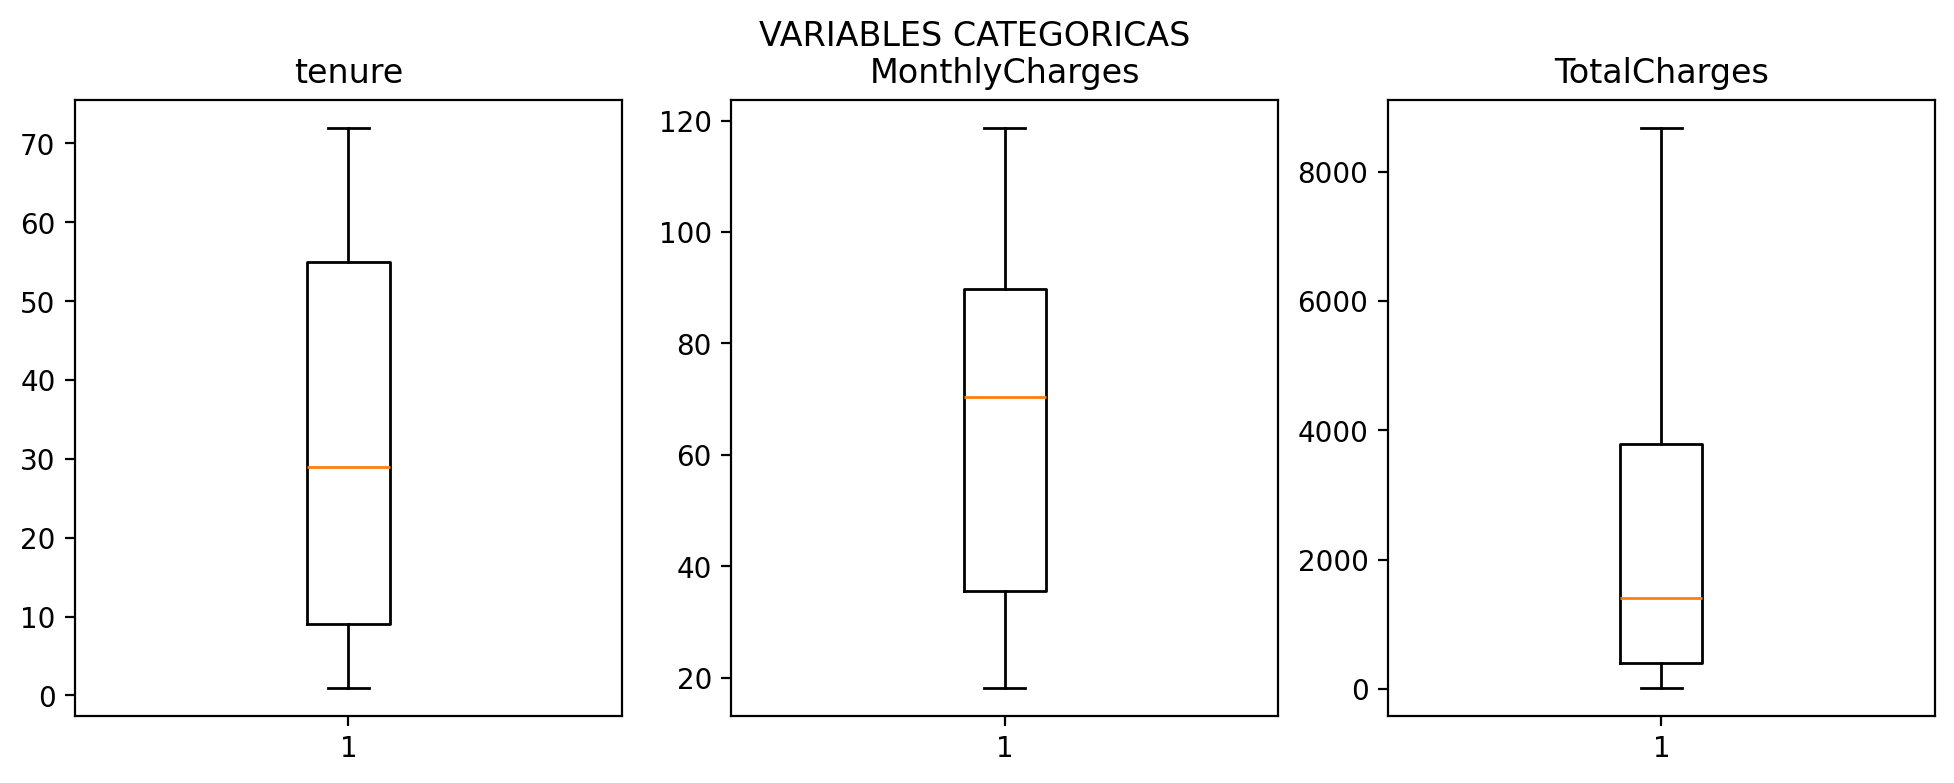

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# numeric columns in DataFrame
col_df_num = ls_cont

n_cols = 3
n_rows = 1

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(12, 4))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)
fig.suptitle('VARIABLES CATEGORICAS')

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(data[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

#### Discretizar

Dscretización de variables continuas

In [19]:
ls_cont

['tenure', 'MonthlyCharges', 'TotalCharges']

In [20]:
def discretizar(df_aux, v, k):
    """
    Bin continuous data into intervals

    Args:
        df_aux: aux DataFrame.
        v: column of dataset
        k: n_bins

    Returns:
        DataFrame plus the column 'v' data into intervals.
    """

    kb = KBinsDiscretizer(
        n_bins=k,
        encode='ordinal',
        strategy='quantile',
        subsample=None
    )

    aux_df = df_aux.copy() # to avoid warnings

    # Sure the data is numeric and not exists rows null or nan
    aux_df[v] = pd.to_numeric( aux_df[v], errors='coerce' )
    aux_df = aux_df.dropna( subset=[v] )

    # Fit the discretizer
    kb.fit( aux_df[[v]] )

    # Get the intervals as strings
    v_bins = kb.bin_edges_[0] # get the limits of the bins

    # Insert into DataFrame column the generated data
    aux_df[f"d_{v}_{k}"] = pd.cut( aux_df[v],
                                  bins=v_bins,
                                  include_lowest=True).astype(str)
    
    return aux_df

In [21]:
def calculo_iv(df, v, tgt, um):
    aux = df.pivot_table(
        index = v,
        columns = tgt,
        values = um[0],
        aggfunc = 'count',
        fill_value = 0
    )

    aux[ list( range(2) ) ] = aux / aux.apply( np.sum )

    aux['w'] = np.log( aux[0] / aux[1] )

    aux['iv'] = (  aux[0] - aux[1] ) * aux['w']

    return v, aux['iv'].sum()

In [22]:
for v in ls_cont:
    for k in range( 2, 6 ):
        # If k is higher than unique values in the column 'v'
        if data[v].nunique() < k:
            print(f"Saltando {v} con {k} bins porque tiene pocos valores unicos")
            continue
        print(f"Para la variable {v} con {k} bins.")
        data = discretizar( data, v, k )

Para la variable tenure con 2 bins.
Para la variable tenure con 3 bins.
Para la variable tenure con 4 bins.
Para la variable tenure con 5 bins.
Para la variable MonthlyCharges con 2 bins.
Para la variable MonthlyCharges con 3 bins.
Para la variable MonthlyCharges con 4 bins.
Para la variable MonthlyCharges con 5 bins.
Para la variable TotalCharges con 2 bins.
Para la variable TotalCharges con 3 bins.
Para la variable TotalCharges con 4 bins.
Para la variable TotalCharges con 5 bins.


In [23]:
# Save the discretized varables
vari = data.filter( like='d_' ).columns.tolist()
vari

['d_tenure_2',
 'd_tenure_3',
 'd_tenure_4',
 'd_tenure_5',
 'd_MonthlyCharges_2',
 'd_MonthlyCharges_3',
 'd_MonthlyCharges_4',
 'd_MonthlyCharges_5',
 'd_TotalCharges_2',
 'd_TotalCharges_3',
 'd_TotalCharges_4',
 'd_TotalCharges_5']

In [24]:
# validate the proporcion of the bins
for v in vari:
    print(f"La variable: {v}")
    display(data[v].value_counts(True))
    print("\n")

La variable: d_tenure_2


d_tenure_2
(0.999, 29.0]   0.51
(29.0, 72.0]    0.49
Name: proportion, dtype: float64



La variable: d_tenure_3


d_tenure_3
(14.0, 47.0]    0.34
(0.999, 14.0]   0.34
(47.0, 72.0]    0.33
Name: proportion, dtype: float64



La variable: d_tenure_4


d_tenure_4
(0.999, 9.0]   0.26
(55.0, 72.0]   0.25
(29.0, 55.0]   0.24
(9.0, 29.0]    0.24
Name: proportion, dtype: float64



La variable: d_tenure_5


d_tenure_5
(0.999, 6.0]   0.21
(20.0, 40.0]   0.20
(60.8, 72.0]   0.20
(6.0, 20.0]    0.20
(40.0, 60.8]   0.19
Name: proportion, dtype: float64



La variable: d_MonthlyCharges_2


d_MonthlyCharges_2
(18.249, 70.35]   0.50
(70.35, 118.75]   0.50
Name: proportion, dtype: float64



La variable: d_MonthlyCharges_3


d_MonthlyCharges_3
(18.249, 50.4]   0.33
(50.4, 84.0]     0.33
(84.0, 118.75]   0.33
Name: proportion, dtype: float64



La variable: d_MonthlyCharges_4


d_MonthlyCharges_4
(35.588, 70.35]    0.25
(18.249, 35.588]   0.25
(89.862, 118.75]   0.25
(70.35, 89.862]    0.25
Name: proportion, dtype: float64



La variable: d_MonthlyCharges_5


d_MonthlyCharges_5
(18.249, 25.05]   0.20
(58.92, 79.15]    0.20
(79.15, 94.3]     0.20
(94.3, 118.75]    0.20
(25.05, 58.92]    0.20
Name: proportion, dtype: float64



La variable: d_TotalCharges_2


d_TotalCharges_2
(18.799, 1397.475]   0.50
(1397.475, 8684.8]   0.50
Name: proportion, dtype: float64



La variable: d_TotalCharges_3


d_TotalCharges_3
(18.799, 678.367]     0.33
(678.367, 2745.367]   0.33
(2745.367, 8684.8]    0.33
Name: proportion, dtype: float64



La variable: d_TotalCharges_4


d_TotalCharges_4
(18.799, 401.45]       0.25
(1397.475, 3794.738]   0.25
(401.45, 1397.475]     0.25
(3794.738, 8684.8]     0.25
Name: proportion, dtype: float64



La variable: d_TotalCharges_5


d_TotalCharges_5
(18.799, 267.07]     0.20
(4475.41, 8684.8]    0.20
(944.17, 2048.95]    0.20
(267.07, 944.17]     0.20
(2048.95, 4475.41]   0.20
Name: proportion, dtype: float64

Mejores variables discretizadas

In [25]:
iv = pd.DataFrame( map( lambda v: calculo_iv( data, v, tgt, um ), vari ), columns=['variable', 'iv'])
iv

,variable,iv
0,d_tenure_2,0.49
1,d_tenure_3,0.66
2,d_tenure_4,0.72
3,d_tenure_5,0.77
4,d_MonthlyCharges_2,0.20
5,d_MonthlyCharges_3,0.17
6,d_MonthlyCharges_4,0.30
7,d_MonthlyCharges_5,0.30
8,d_TotalCharges_2,0.16
9,d_TotalCharges_3,0.24


In [26]:
iv['raiz'] = iv['variable'].map( lambda x: '_'.join( x.split('_')[1:-1] ) )
iv

,variable,iv,raiz
0,d_tenure_2,0.49,tenure
1,d_tenure_3,0.66,tenure
2,d_tenure_4,0.72,tenure
3,d_tenure_5,0.77,tenure
4,d_MonthlyCharges_2,0.20,MonthlyCharges
5,d_MonthlyCharges_3,0.17,MonthlyCharges
6,d_MonthlyCharges_4,0.30,MonthlyCharges
7,d_MonthlyCharges_5,0.30,MonthlyCharges
8,d_TotalCharges_2,0.16,TotalCharges
9,d_TotalCharges_3,0.24,TotalCharges


In [27]:
iv = iv.sort_values( by=['raiz', 'iv', 'variable'], 
                    ascending=[0, 0, 0] 
                    ).reset_index(drop=True)
iv = iv.loc[ iv['iv'] != np.inf ].reset_index(drop=True)
iv['id'] = iv.groupby('raiz').cumcount()+1
iv

,variable,iv,raiz,id
0,d_tenure_5,0.77,tenure,1
1,d_tenure_4,0.72,tenure,2
2,d_tenure_3,0.66,tenure,3
3,d_tenure_2,0.49,tenure,4
4,d_TotalCharges_5,0.30,TotalCharges,1
5,d_TotalCharges_4,0.29,TotalCharges,2
6,d_TotalCharges_3,0.24,TotalCharges,3
7,d_TotalCharges_2,0.16,TotalCharges,4
8,d_MonthlyCharges_4,0.30,MonthlyCharges,1
9,d_MonthlyCharges_5,0.30,MonthlyCharges,2


In [28]:
iv = iv[iv['id'] == 1].reset_index(drop=True)
iv

,variable,iv,raiz,id
0,d_tenure_5,0.77,tenure,1
1,d_TotalCharges_5,0.30,TotalCharges,1
2,d_MonthlyCharges_4,0.30,MonthlyCharges,1


In [29]:
besti = iv['variable'].tolist()
besti

['d_tenure_5', 'd_TotalCharges_5', 'd_MonthlyCharges_4']

### Variables discretas (categoricas)

In [30]:
data.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,d_tenure_2,d_tenure_3,d_tenure_4,d_tenure_5,d_MonthlyCharges_2,d_MonthlyCharges_3,d_MonthlyCharges_4,d_MonthlyCharges_5,d_TotalCharges_2,d_TotalCharges_3,d_TotalCharges_4,d_TotalCharges_5
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,3,4,5,2,3,4,5,2,3,4,5
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"(0.999, 29.0]","(14.0, 47.0]","(0.999, 9.0]","(0.999, 6.0]","(18.249, 70.35]","(18.249, 50.4]","(35.588, 70.35]","(18.249, 25.05]","(18.799, 1397.475]","(18.799, 678.367]","(18.799, 401.45]","(18.799, 267.07]"
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,3558,2369,1843,1470,3519,2345,1761,1416,3516,2344,1758,1407


In [31]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [32]:
ls_disc = data.select_dtypes(include=['object']).columns.to_list()

ls_disc = [_ for _ in ls_disc if _ not in ('customerID', 'Churn')]

ls_disc = [ x for x in ls_disc if x[:2] != 'd_']

len(ls_disc), ls_disc

(16,
 ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

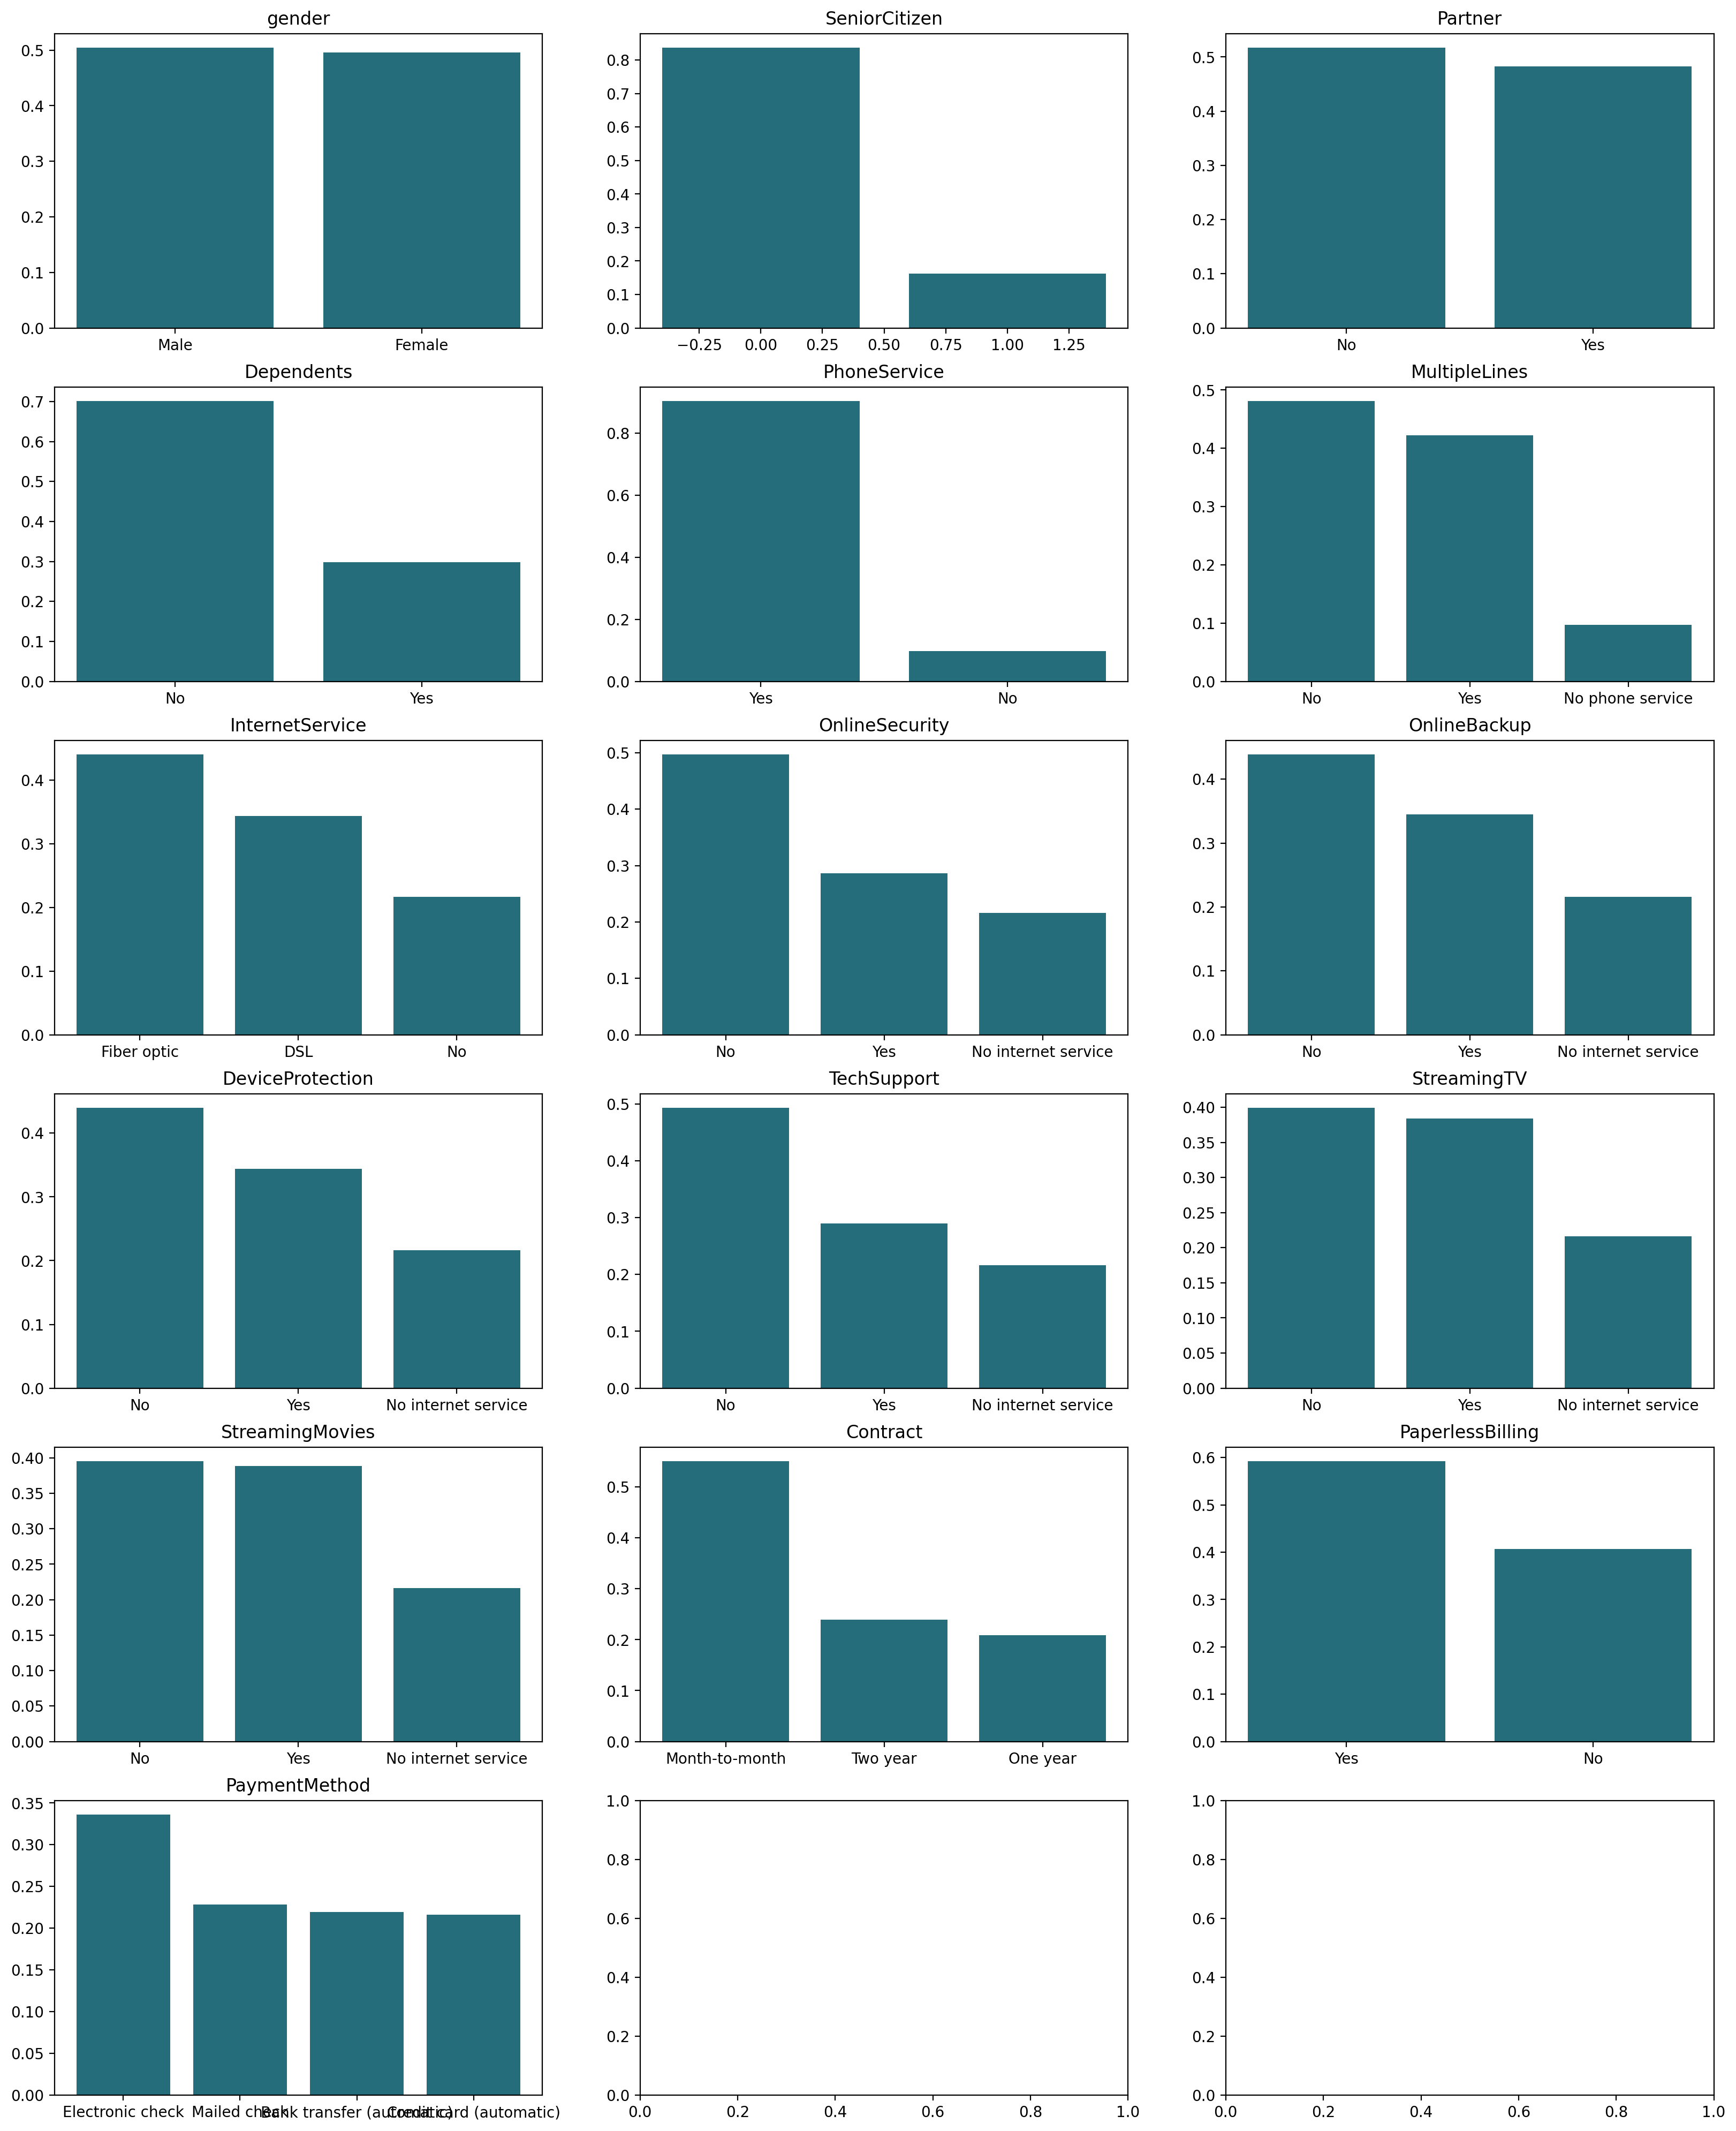

In [33]:
n_cols = 3
n_rows = 6

fig = plt.figure(figsize=(20, 25))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        pd_aux = pd.DataFrame(data[ls_disc[index_col]].value_counts(normalize=True, dropna=False)).reset_index(drop=False)
        ax_array[row, col].bar(pd_aux[ls_disc[index_col]], pd_aux['proportion'], color="#256D7B")
        # ax_array[row, col].hist(data[ls_disc[index_col]])
        ax_array[row, col].set_title(ls_disc[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(ls_disc):
            break

In [34]:
def freq(df, var):
    if type(var) != list:
        var = [var]
    for v in var:
        #v = 'state'
        aux = df[v].value_counts().to_frame().rename(columns={'count':'FA'})
        aux['FR'] = aux['FA'] / aux['FA'].sum()
        aux[['FAA','FRA']] = aux.apply(  np.cumsum )
        print(f"La variable: {v}")
        display(aux)
        print("\n")

#freq(data, var=ls_disc)

In [35]:
iv2 = pd.DataFrame( map( lambda v: calculo_iv( data, v, tgt[0], um ), ls_disc ), columns=['variable', 'iv'] )
iv2

,variable,iv
0,gender,0.00
1,SeniorCitizen,0.11
2,Partner,0.12
3,Dependents,0.15
4,PhoneService,0.00
5,MultipleLines,0.01
6,InternetService,0.62
7,OnlineSecurity,0.72
8,OnlineBackup,0.53
9,DeviceProtection,0.50


In [36]:
iv = pd.concat( [iv, iv2], ignore_index=True )
iv

,variable,iv,raiz,id
0,d_tenure_5,0.77,tenure,1.00
1,d_TotalCharges_5,0.30,TotalCharges,1.00
2,d_MonthlyCharges_4,0.30,MonthlyCharges,1.00
3,gender,0.00,NaN,NaN
4,SeniorCitizen,0.11,NaN,NaN
5,Partner,0.12,NaN,NaN
6,Dependents,0.15,NaN,NaN
7,PhoneService,0.00,NaN,NaN
8,MultipleLines,0.01,NaN,NaN
9,InternetService,0.62,NaN,NaN


In [37]:
iv = iv[['variable', 'iv']].sort_values( by='iv', ascending=False ).reset_index(drop=True)
iv

,variable,iv
0,Contract,1.23
1,d_tenure_5,0.77
2,OnlineSecurity,0.72
3,TechSupport,0.70
4,InternetService,0.62
5,OnlineBackup,0.53
6,DeviceProtection,0.50
7,PaymentMethod,0.46
8,StreamingMovies,0.38
9,StreamingTV,0.38


Descartar variables

In [38]:
iv_final = iv.loc[ ( iv['iv'] >= 0.01 ) & ( iv['iv'] <= 0.9 ) ].reset_index(drop=True)
iv_final

,variable,iv
0,d_tenure_5,0.77
1,OnlineSecurity,0.72
2,TechSupport,0.70
3,InternetService,0.62
4,OnlineBackup,0.53
5,DeviceProtection,0.50
6,PaymentMethod,0.46
7,StreamingMovies,0.38
8,StreamingTV,0.38
9,d_MonthlyCharges_4,0.30


In [39]:
best = iv_final['variable'].tolist()
best

['d_tenure_5',
 'OnlineSecurity',
 'TechSupport',
 'InternetService',
 'OnlineBackup',
 'DeviceProtection',
 'PaymentMethod',
 'StreamingMovies',
 'StreamingTV',
 'd_MonthlyCharges_4',
 'd_TotalCharges_5',
 'PaperlessBilling',
 'Dependents',
 'Partner',
 'SeniorCitizen']

In [40]:
data[ best ]

,d_tenure_5,OnlineSecurity,TechSupport,InternetService,OnlineBackup,DeviceProtection,PaymentMethod,StreamingMovies,StreamingTV,d_MonthlyCharges_4,d_TotalCharges_5,PaperlessBilling,Dependents,Partner,SeniorCitizen
0,"(0.999, 6.0]",No,No,DSL,Yes,No,Electronic check,No,No,"(18.249, 35.588]","(18.799, 267.07]",Yes,No,Yes,0
1,"(20.0, 40.0]",Yes,No,DSL,No,Yes,Mailed check,No,No,"(35.588, 70.35]","(944.17, 2048.95]",No,No,No,0
2,"(0.999, 6.0]",Yes,No,DSL,Yes,No,Mailed check,No,No,"(35.588, 70.35]","(18.799, 267.07]",Yes,No,No,0
3,"(40.0, 60.8]",Yes,Yes,DSL,No,Yes,Bank transfer (automatic),No,No,"(35.588, 70.35]","(944.17, 2048.95]",No,No,No,0
4,"(0.999, 6.0]",No,No,Fiber optic,No,No,Electronic check,No,No,"(70.35, 89.862]","(18.799, 267.07]",Yes,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,"(20.0, 40.0]",Yes,Yes,DSL,No,Yes,Mailed check,Yes,Yes,"(70.35, 89.862]","(944.17, 2048.95]",Yes,Yes,Yes,0
7039,"(60.8, 72.0]",No,No,Fiber optic,Yes,Yes,Credit card (automatic),Yes,Yes,"(89.862, 118.75]","(4475.41, 8684.8]",Yes,Yes,Yes,0
7040,"(6.0, 20.0]",Yes,No,DSL,No,No,Electronic check,No,No,"(18.249, 35.588]","(267.07, 944.17]",Yes,Yes,Yes,0
7041,"(0.999, 6.0]",No,No,Fiber optic,No,No,Mailed check,No,No,"(70.35, 89.862]","(267.07, 944.17]",Yes,No,Yes,1


### Transformación WoE

In [41]:
def clasificacion_woe(df, v, tgt, um):

    """
    Args:
        df: aux DataFrame.
        v: column of dataset
        tgt: target
        um: unit
    Returns:
        set with v: column name, and map of values
    """

    aux = df.pivot_table(
        index=v,
        columns=tgt,
        values=um[0],
        aggfunc='count',
        fill_value=0
    )

    aux[ list( range(2) ) ] = aux / aux.apply(np.sum)

    aux['w'] = np.log( aux[0] / aux[1] )

    aux.drop( range(2), axis=1, inplace=True )

    aux = aux.to_dict()['w']

    return v, aux

In [42]:
mapa_woe = list( map( lambda v: clasificacion_woe( data, v, tgt[0], um ), best ) )
pd.DataFrame(mapa_woe)

,0,1
0,d_tenure_5,"{'(0.999, 6.0]': -1.149645670048609, '(20.0, 4..."
1,OnlineSecurity,"{'No': -0.6842483115043723, 'No internet servi..."
2,TechSupport,"{'No': -0.6788519953341675, 'No internet servi..."
3,InternetService,"{'DSL': 0.43400347991144483, 'Fiber optic': -0..."
4,OnlineBackup,"{'No': -0.6082190344626301, 'No internet servi..."
5,DeviceProtection,"{'No': -0.5746944923200262, 'No internet servi..."
6,PaymentMethod,{'Bank transfer (automatic)': 0.58866162190420...
7,StreamingMovies,"{'No': -0.34071426876048766, 'No internet serv..."
8,StreamingTV,"{'No': -0.33203140845872675, 'No internet serv..."
9,d_MonthlyCharges_4,"{'(18.249, 35.588]': 1.0423807669091978, '(35...."


In [43]:
for v, mapa in mapa_woe:
    data[f"w_{v}"] = data[v].replace(mapa)


In [44]:
varw = data.filter( like='w_' ).columns.tolist()
varw

['w_d_tenure_5',
 'w_OnlineSecurity',
 'w_TechSupport',
 'w_InternetService',
 'w_OnlineBackup',
 'w_DeviceProtection',
 'w_PaymentMethod',
 'w_StreamingMovies',
 'w_StreamingTV',
 'w_d_MonthlyCharges_4',
 'w_d_TotalCharges_5',
 'w_PaperlessBilling',
 'w_Dependents',
 'w_Partner',
 'w_SeniorCitizen']

## Modelado

In [45]:
data[ um + varw + tgt].sample(5)

,customerID,w_d_tenure_5,w_OnlineSecurity,w_TechSupport,w_InternetService,w_OnlineBackup,w_DeviceProtection,w_PaymentMethod,w_StreamingMovies,w_StreamingTV,w_d_MonthlyCharges_4,w_d_TotalCharges_5,w_PaperlessBilling,w_Dependents,w_Partner,w_SeniorCitizen,Churn
2321,9776-OJUZI,1.63,-0.68,-0.68,-0.69,0.27,0.22,0.59,-0.34,-0.17,-0.30,0.79,-0.33,-0.23,-0.31,-0.68,0
6560,9801-NOSHQ,0.23,1.51,1.51,1.51,1.51,1.51,0.42,1.51,1.51,1.04,-0.12,0.61,0.68,-0.31,0.16,0
2824,8857-CUPFQ,1.63,1.51,1.51,1.51,1.51,1.51,0.42,1.51,1.51,1.04,0.32,0.61,-0.23,0.39,0.16,0
3982,9365-CSLBQ,1.63,1.51,1.51,1.51,1.51,1.51,0.42,1.51,1.51,1.04,0.32,0.61,0.68,-0.31,0.16,0
3358,5447-VYTKW,0.23,0.75,0.70,0.43,-0.61,-0.57,0.42,-0.34,-0.33,0.10,0.32,0.61,-0.23,-0.31,0.16,0


In [46]:
um + tgt

['customerID', 'Churn']

In [47]:
X = data[ um + varw ]
y = data[ um + tgt ]

print("Dimensiones del dataset: ", X.shape, y.shape)

Dimensiones del dataset:  (7032, 16) (7032, 2)


In [48]:
X.head(10)

,customerID,w_d_tenure_5,w_OnlineSecurity,w_TechSupport,w_InternetService,w_OnlineBackup,w_DeviceProtection,w_PaymentMethod,w_StreamingMovies,w_StreamingTV,w_d_MonthlyCharges_4,w_d_TotalCharges_5,w_PaperlessBilling,w_Dependents,w_Partner,w_SeniorCitizen
0,7590-VHVEG,-1.15,-0.68,-0.68,0.43,0.27,-0.57,-0.83,-0.34,-0.33,1.04,-0.86,-0.33,-0.23,0.39,0.16
1,5575-GNVDE,0.23,0.75,-0.68,0.43,-0.61,0.22,0.42,-0.34,-0.33,0.10,0.32,0.61,-0.23,-0.31,0.16
2,3668-QPYBK,-1.15,0.75,-0.68,0.43,0.27,-0.57,0.42,-0.34,-0.33,0.10,-0.86,-0.33,-0.23,-0.31,0.16
3,7795-CFOCW,0.68,0.75,0.70,0.43,-0.61,0.22,0.59,-0.34,-0.33,0.10,0.32,0.61,-0.23,-0.31,0.16
4,9237-HQITU,-1.15,-0.68,-0.68,-0.69,-0.61,-0.57,-0.83,-0.34,-0.33,-0.51,-0.86,-0.33,-0.23,-0.31,0.16
5,9305-CDSKC,-0.33,-0.68,-0.68,-0.69,-0.61,0.22,-0.83,-0.17,-0.17,-0.30,-0.12,-0.33,-0.23,-0.31,0.16
6,1452-KIOVK,0.23,-0.68,-0.68,-0.69,0.27,-0.57,0.70,-0.34,-0.17,-0.51,0.32,-0.33,0.68,-0.31,0.16
7,6713-OKOMC,-0.33,0.75,-0.68,0.43,-0.61,-0.57,0.42,-0.34,-0.33,1.04,-0.12,0.61,-0.23,-0.31,0.16
8,7892-POOKP,0.23,-0.68,0.70,-0.69,-0.61,0.22,-0.83,-0.17,-0.17,-0.30,0.19,-0.33,-0.23,0.39,0.16
9,6388-TABGU,1.63,0.75,-0.68,0.43,0.27,-0.57,0.59,-0.34,-0.33,0.10,0.19,0.61,0.68,-0.31,0.16


In [49]:
X.columns

Index(['customerID', 'w_d_tenure_5', 'w_OnlineSecurity', 'w_TechSupport',
       'w_InternetService', 'w_OnlineBackup', 'w_DeviceProtection',
       'w_PaymentMethod', 'w_StreamingMovies', 'w_StreamingTV',
       'w_d_MonthlyCharges_4', 'w_d_TotalCharges_5', 'w_PaperlessBilling',
       'w_Dependents', 'w_Partner', 'w_SeniorCitizen'],
      dtype='object')

In [50]:
y.head()

,customerID,Churn
0,7590-VHVEG,0
1,5575-GNVDE,0
2,3668-QPYBK,1
3,7795-CFOCW,0
4,9237-HQITU,1


#### Conjunto de entrenamiento y validación

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [52]:
X_train.head()

,customerID,w_d_tenure_5,w_OnlineSecurity,w_TechSupport,w_InternetService,w_OnlineBackup,w_DeviceProtection,w_PaymentMethod,w_StreamingMovies,w_StreamingTV,w_d_MonthlyCharges_4,w_d_TotalCharges_5,w_PaperlessBilling,w_Dependents,w_Partner,w_SeniorCitizen
472,1304-BCCFO,-0.33,-0.68,-0.68,0.43,-0.61,0.22,0.42,-0.17,-0.17,0.10,-0.12,-0.33,-0.23,0.39,0.16
908,4694-PHWFW,-0.33,1.51,1.51,1.51,1.51,1.51,0.42,1.51,1.51,1.04,-0.86,0.61,0.68,-0.31,0.16
2368,6650-BWFRT,1.63,0.75,0.70,-0.69,0.27,0.22,0.70,-0.17,-0.17,-0.30,0.79,-0.33,-0.23,0.39,0.16
2917,2181-TIDSV,1.63,1.51,1.51,1.51,1.51,1.51,0.59,1.51,1.51,1.04,0.32,-0.33,0.68,0.39,0.16
3858,0840-DCNZE,0.68,0.75,0.70,0.43,0.27,0.22,0.59,-0.17,-0.17,-0.51,0.19,-0.33,-0.23,-0.31,0.16


In [53]:
X_train[ varw ].head()

,w_d_tenure_5,w_OnlineSecurity,w_TechSupport,w_InternetService,w_OnlineBackup,w_DeviceProtection,w_PaymentMethod,w_StreamingMovies,w_StreamingTV,w_d_MonthlyCharges_4,w_d_TotalCharges_5,w_PaperlessBilling,w_Dependents,w_Partner,w_SeniorCitizen
472,-0.33,-0.68,-0.68,0.43,-0.61,0.22,0.42,-0.17,-0.17,0.10,-0.12,-0.33,-0.23,0.39,0.16
908,-0.33,1.51,1.51,1.51,1.51,1.51,0.42,1.51,1.51,1.04,-0.86,0.61,0.68,-0.31,0.16
2368,1.63,0.75,0.70,-0.69,0.27,0.22,0.70,-0.17,-0.17,-0.30,0.79,-0.33,-0.23,0.39,0.16
2917,1.63,1.51,1.51,1.51,1.51,1.51,0.59,1.51,1.51,1.04,0.32,-0.33,0.68,0.39,0.16
3858,0.68,0.75,0.70,0.43,0.27,0.22,0.59,-0.17,-0.17,-0.51,0.19,-0.33,-0.23,-0.31,0.16


In [54]:
y_train.head()

,customerID,Churn
472,1304-BCCFO,0
908,4694-PHWFW,0
2368,6650-BWFRT,0
2917,2181-TIDSV,0
3858,0840-DCNZE,0


In [55]:
y_train[ tgt[0] ].head()

472     0
908     0
2368    0
2917    0
3858    0
Name: Churn, dtype: int64

#### Modelo (Clasificación)

In [56]:
logreg = LogisticRegression()
logreg.fit( X_train[ varw ] , y_train[tgt[0]] )

LogisticRegression()

In [57]:
logreg.score(X_test[ varw ], y_test[tgt[0]])

0.8017057569296375

In [58]:
ls_scores = cross_val_score(cv=3, 
                            estimator=logreg, 
                            X=X_train[ varw ], 
                            y=y_train[ tgt[0] ],
                            scoring="roc_auc",
                            n_jobs=-1 )

print(ls_scores)
print(f"mean: {np.mean(ls_scores)}")
print(f"std: {np.std(ls_scores)}")

[0.82546707 0.84840611 0.84549309]
mean: 0.8397887577734751
std: 0.010196552628065368


#### Metricas

In [59]:
y_predict = logreg.predict(X_test[ varw ])
# y_test
roc_auc_score(y_score=y_predict, y_true=y_test[ tgt[0] ])

np.float64(0.7001165586071246)

In [60]:
varw

['w_d_tenure_5',
 'w_OnlineSecurity',
 'w_TechSupport',
 'w_InternetService',
 'w_OnlineBackup',
 'w_DeviceProtection',
 'w_PaymentMethod',
 'w_StreamingMovies',
 'w_StreamingTV',
 'w_d_MonthlyCharges_4',
 'w_d_TotalCharges_5',
 'w_PaperlessBilling',
 'w_Dependents',
 'w_Partner',
 'w_SeniorCitizen']

In [61]:
print(logreg.intercept_[0])
print(logreg.coef_[0][0])

-1.0240784732936568
-0.7875703191485992


In [62]:
cnf_matrix = confusion_matrix(y_test[ tgt[0] ], y_predict)
cnf_matrix

array([[948,  88],
       [191, 180]])

[[948  88]
 [191 180]]


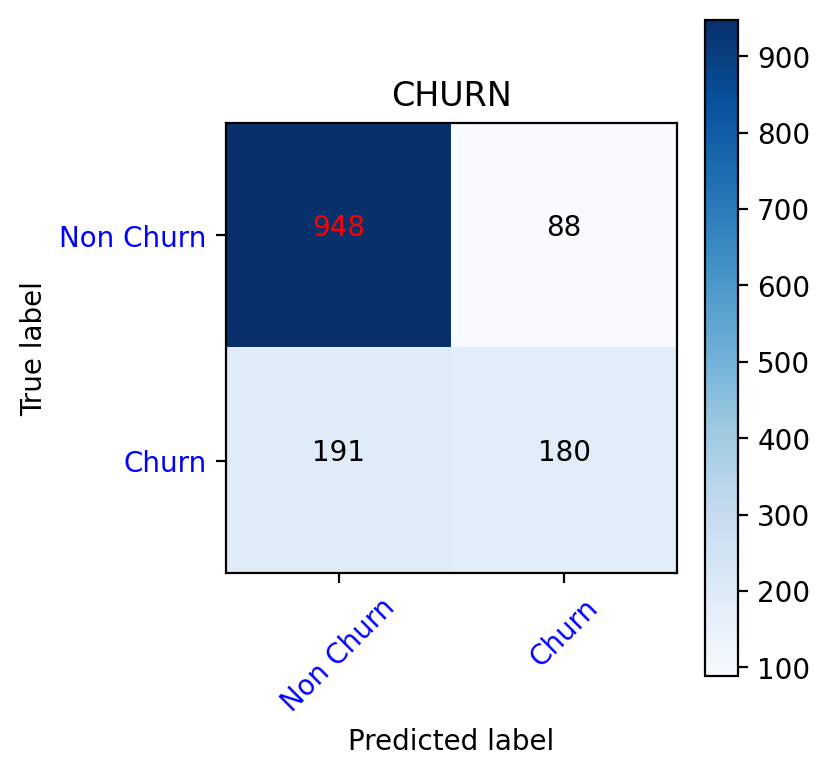

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.figure(figsize=(4,4))
    plt.rcParams.update({'font.size': 10})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color="blue")
    plt.yticks(tick_marks, classes, color="blue")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cfm = confusion_matrix(y_test[ tgt[0] ], y_pred=y_predict)
plot_confusion_matrix(cfm, classes=['Non Churn','Churn'],
                      title='CHURN')
tn, fp, fn, tp = cfm.ravel()

In [64]:
target_names = ['0', '1']
print(classification_report(y_test[tgt[0]], y_predict, target_names=target_names))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.49      0.56       371

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



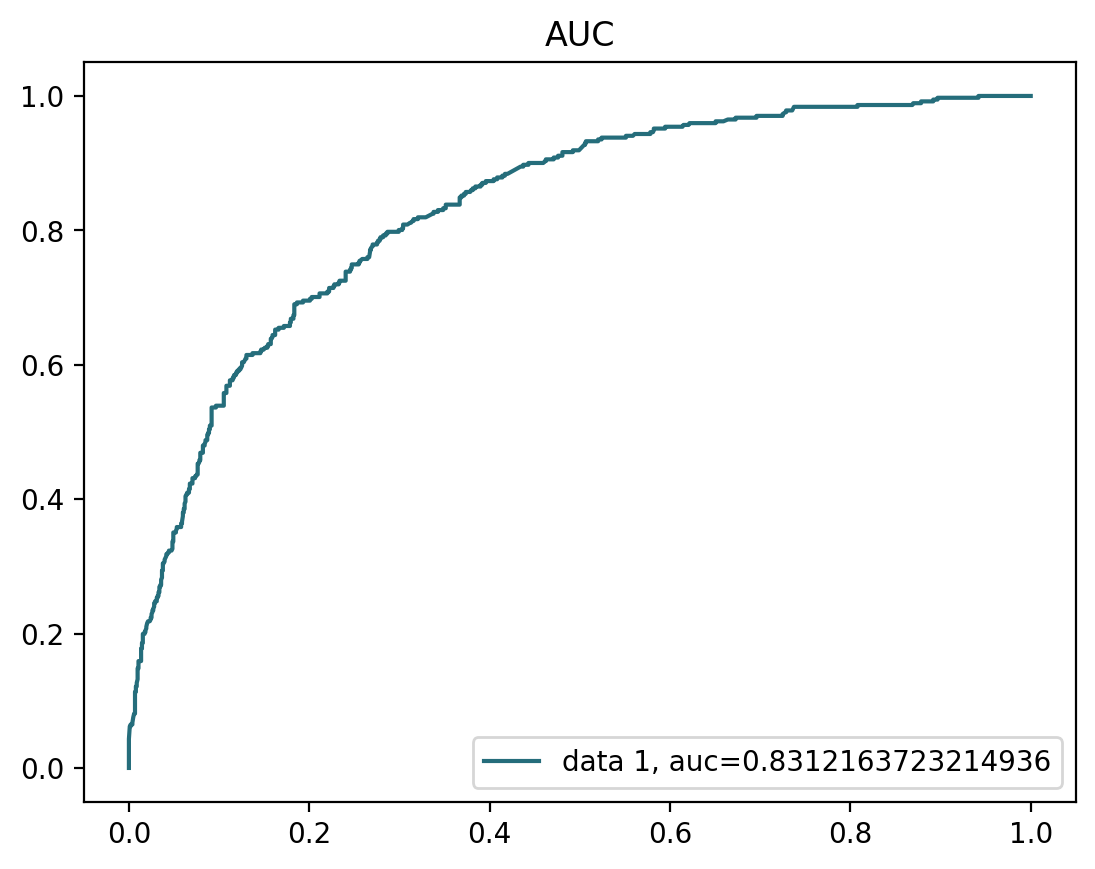

In [104]:
y_pred_proba = logreg.predict_proba(X_test[ varw ])[::,1]
fpr, tpr, _ = roc_curve(y_test[tgt[0]],  y_pred_proba)
auc = roc_auc_score(y_test[tgt[0]], y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc), color="#256D7B")
plt.legend(loc=4)
plt.title("AUC")
plt.show()

## Score

* __Factor__ = $\frac{PDO}{ln(2)}$
* __PDO__ : Points Double Odds
* __offset__ = $score - factor*ln(odds)$ 
* __score__ : Punto para fijar odds de referencia
* __puntos__ = $ (-WoE*\beta + \frac{\alpha}{n})*factor + \frac{offset}{n}$

In [66]:
PDO = 40
base_score = 500
base_odds = 2

factor = PDO / np.log(2)

offset = base_score - factor * np.log( base_odds)

print(f"Factor: {factor}, Offset: {offset}")

betas = logreg.coef_[0].tolist()
beta0 = logreg.intercept_[0]

n = len(betas)

Factor: 57.70780163555854, Offset: 460.0


#### Creación de puntos

In [67]:
for v, beta in zip(varw, betas):

    print(f"Variable: {v}, con beta: {beta}")

    X_train[f'pts_{v}'] = np.ceil(  ( -X_train[v] * beta+beta0 / n  ) * factor + offset / n )
    X_test[f'pts_{v}'] = np.ceil(  ( -X_test[v] * beta+beta0 / n  ) * factor + offset / n )

Variable: w_d_tenure_5, con beta: -0.7875703191485992
Variable: w_OnlineSecurity, con beta: -0.27007658406608137
Variable: w_TechSupport, con beta: -0.30109679635987074
Variable: w_InternetService, con beta: -1.1391116263666685
Variable: w_OnlineBackup, con beta: -0.16775714517787507
Variable: w_DeviceProtection, con beta: -0.09789117363268714
Variable: w_PaymentMethod, con beta: -0.29532769960227184
Variable: w_StreamingMovies, con beta: 0.38637985705594247
Variable: w_StreamingTV, con beta: 0.3878710498291767
Variable: w_d_MonthlyCharges_4, con beta: 0.2225627204982279
Variable: w_d_TotalCharges_5, con beta: -0.3477886551248481
Variable: w_PaperlessBilling, con beta: -0.41839066865192137
Variable: w_Dependents, con beta: -0.23723443375444186
Variable: w_Partner, con beta: -0.06434079806061903
Variable: w_SeniorCitizen, con beta: -0.3419904381730536


In [68]:
len(logreg.coef_[0])

15

In [69]:
len(X_test[ varw ].columns)

15

Intercept: [-1.02407847]

Feature Coefficients:
                  Feature  Coefficient
0           w_d_tenure_5        -0.79
1       w_OnlineSecurity        -0.27
2          w_TechSupport        -0.30
3      w_InternetService        -1.14
4         w_OnlineBackup        -0.17
5     w_DeviceProtection        -0.10
6        w_PaymentMethod        -0.30
7      w_StreamingMovies         0.39
8          w_StreamingTV         0.39
9   w_d_MonthlyCharges_4         0.22
10    w_d_TotalCharges_5        -0.35
11    w_PaperlessBilling        -0.42
12          w_Dependents        -0.24
13             w_Partner        -0.06
14       w_SeniorCitizen        -0.34


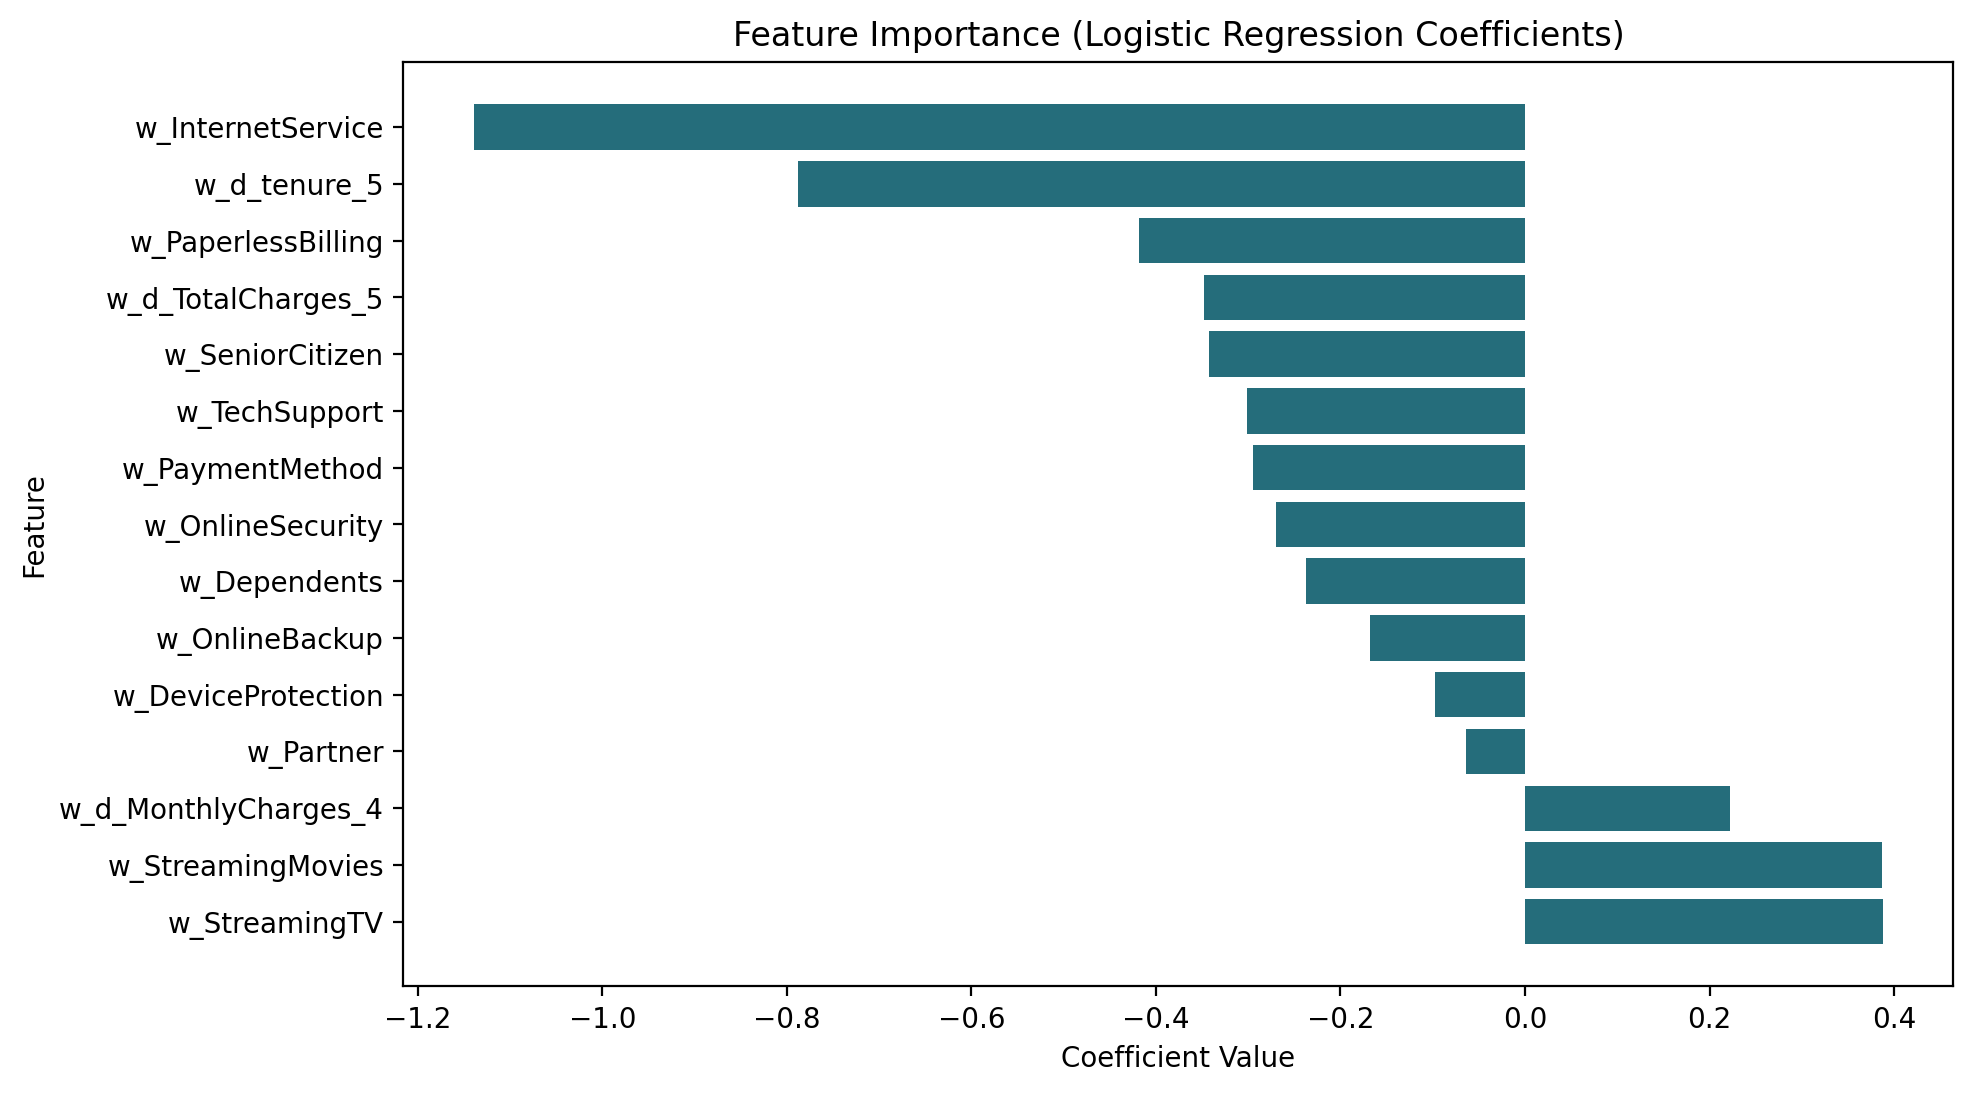

In [70]:
# Extraer información del modelo
print("Intercept:", logreg.intercept_)
coeff_df = pd.DataFrame({"Feature": X_test[ varw ].columns, "Coefficient": logreg.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="#256D7B")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

In [71]:
varp = X_train.filter( like='pts' ).columns.tolist()
varp

['pts_w_d_tenure_5',
 'pts_w_OnlineSecurity',
 'pts_w_TechSupport',
 'pts_w_InternetService',
 'pts_w_OnlineBackup',
 'pts_w_DeviceProtection',
 'pts_w_PaymentMethod',
 'pts_w_StreamingMovies',
 'pts_w_StreamingTV',
 'pts_w_d_MonthlyCharges_4',
 'pts_w_d_TotalCharges_5',
 'pts_w_PaperlessBilling',
 'pts_w_Dependents',
 'pts_w_Partner',
 'pts_w_SeniorCitizen']

In [72]:
X_train['score'] = X_train[varp].sum(axis=1)
X_test['score'] = X_test[varp].sum(axis=1)

In [73]:
varw

['w_d_tenure_5',
 'w_OnlineSecurity',
 'w_TechSupport',
 'w_InternetService',
 'w_OnlineBackup',
 'w_DeviceProtection',
 'w_PaymentMethod',
 'w_StreamingMovies',
 'w_StreamingTV',
 'w_d_MonthlyCharges_4',
 'w_d_TotalCharges_5',
 'w_PaperlessBilling',
 'w_Dependents',
 'w_Partner',
 'w_SeniorCitizen']

In [74]:
X_train

,customerID,w_d_tenure_5,w_OnlineSecurity,w_TechSupport,w_InternetService,w_OnlineBackup,w_DeviceProtection,w_PaymentMethod,w_StreamingMovies,w_StreamingTV,w_d_MonthlyCharges_4,w_d_TotalCharges_5,w_PaperlessBilling,w_Dependents,w_Partner,w_SeniorCitizen,pts_w_d_tenure_5,pts_w_OnlineSecurity,pts_w_TechSupport,pts_w_InternetService,pts_w_OnlineBackup,pts_w_DeviceProtection,pts_w_PaymentMethod,pts_w_StreamingMovies,pts_w_StreamingTV,pts_w_d_MonthlyCharges_4,pts_w_d_TotalCharges_5,pts_w_PaperlessBilling,pts_w_Dependents,pts_w_Partner,pts_w_SeniorCitizen,score
472,1304-BCCFO,-0.33,-0.68,-0.68,0.43,-0.61,0.22,0.42,-0.17,-0.17,0.10,-0.12,-0.33,-0.23,0.39,0.16,12.00,17.00,15.00,56.00,21.00,28.00,34.00,31.00,31.00,26.00,25.00,19.00,24.00,29.00,30.00,398.00
908,4694-PHWFW,-0.33,1.51,1.51,1.51,1.51,1.51,0.42,1.51,1.51,1.04,-0.86,0.61,0.68,-0.31,0.16,12.00,51.00,53.00,126.00,42.00,36.00,34.00,-6.00,-6.00,14.00,10.00,42.00,37.00,26.00,30.00,501.00
2368,6650-BWFRT,1.63,0.75,0.70,-0.69,0.27,0.22,0.70,-0.17,-0.17,-0.30,0.79,-0.33,-0.23,0.39,0.16,101.00,39.00,39.00,-18.00,30.00,28.00,39.00,31.00,31.00,31.00,43.00,19.00,24.00,29.00,30.00,496.00
2917,2181-TIDSV,1.63,1.51,1.51,1.51,1.51,1.51,0.59,1.51,1.51,1.04,0.32,-0.33,0.68,0.39,0.16,101.00,51.00,53.00,126.00,42.00,36.00,37.00,-6.00,-6.00,14.00,34.00,19.00,37.00,29.00,30.00,597.00
3858,0840-DCNZE,0.68,0.75,0.70,0.43,0.27,0.22,0.59,-0.17,-0.17,-0.51,0.19,-0.33,-0.23,-0.31,0.16,58.00,39.00,39.00,56.00,30.00,28.00,37.00,31.00,31.00,34.00,31.00,19.00,24.00,26.00,30.00,513.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2165-VOEGB,0.68,0.75,0.70,-0.69,0.27,-0.57,0.59,-0.17,-0.17,-0.30,0.79,-0.33,0.68,-0.31,0.16,58.00,39.00,39.00,-18.00,30.00,24.00,37.00,31.00,31.00,31.00,43.00,19.00,37.00,26.00,30.00,457.00
6568,5647-URDKA,-0.33,1.51,1.51,1.51,1.51,1.51,0.42,1.51,1.51,1.04,-0.86,0.61,0.68,0.39,0.16,12.00,51.00,53.00,126.00,42.00,36.00,34.00,-6.00,-6.00,14.00,10.00,42.00,37.00,29.00,30.00,504.00
5612,9670-BPNXF,0.68,0.75,0.70,0.43,0.27,-0.57,0.70,-0.34,-0.33,0.10,0.19,-0.33,-0.23,-0.31,0.16,58.00,39.00,39.00,56.00,30.00,24.00,39.00,35.00,35.00,26.00,31.00,19.00,24.00,26.00,30.00,511.00
5717,8169-SAEJD,1.63,0.75,-0.68,0.43,0.27,-0.57,0.70,-0.17,-0.17,0.10,0.19,0.61,-0.23,0.39,-0.68,101.00,39.00,15.00,56.00,30.00,24.00,39.00,31.00,31.00,26.00,31.00,42.00,24.00,29.00,14.00,532.00


In [75]:
lst = []

for vi, vp in zip( [x for x in varw], varp):
    print(vi , " ----- " , vp)
    X_aux = X_train.merge(data[um+[x[2:] for x in varw]], on=um, how='left', )
    #print(vi, vi[2:], vp)
    aux = X_aux[[vi,vi[2:],vp]].drop_duplicates()
    aux = aux.sort_values( by = vi , ascending = True ).reset_index(drop=True)
    aux.columns = ['valor','atributo','puntos']
    aux['característica'] = vi
    lst.append(aux)

w_d_tenure_5  -----  pts_w_d_tenure_5
w_OnlineSecurity  -----  pts_w_OnlineSecurity
w_TechSupport  -----  pts_w_TechSupport
w_InternetService  -----  pts_w_InternetService
w_OnlineBackup  -----  pts_w_OnlineBackup
w_DeviceProtection  -----  pts_w_DeviceProtection
w_PaymentMethod  -----  pts_w_PaymentMethod
w_StreamingMovies  -----  pts_w_StreamingMovies
w_StreamingTV  -----  pts_w_StreamingTV
w_d_MonthlyCharges_4  -----  pts_w_d_MonthlyCharges_4
w_d_TotalCharges_5  -----  pts_w_d_TotalCharges_5
w_PaperlessBilling  -----  pts_w_PaperlessBilling
w_Dependents  -----  pts_w_Dependents
w_Partner  -----  pts_w_Partner
w_SeniorCitizen  -----  pts_w_SeniorCitizen


In [88]:
scorecard = pd.concat(lst,ignore_index=True)
scorecard.head()

,valor,atributo,puntos,característica
0,-1.15,"(0.999, 6.0]",-25.00,w_d_tenure_5
1,-0.33,"(6.0, 20.0]",12.00,w_d_tenure_5
2,0.23,"(20.0, 40.0]",38.00,w_d_tenure_5
3,0.68,"(40.0, 60.8]",58.00,w_d_tenure_5
4,1.63,"(60.8, 72.0]",101.00,w_d_tenure_5


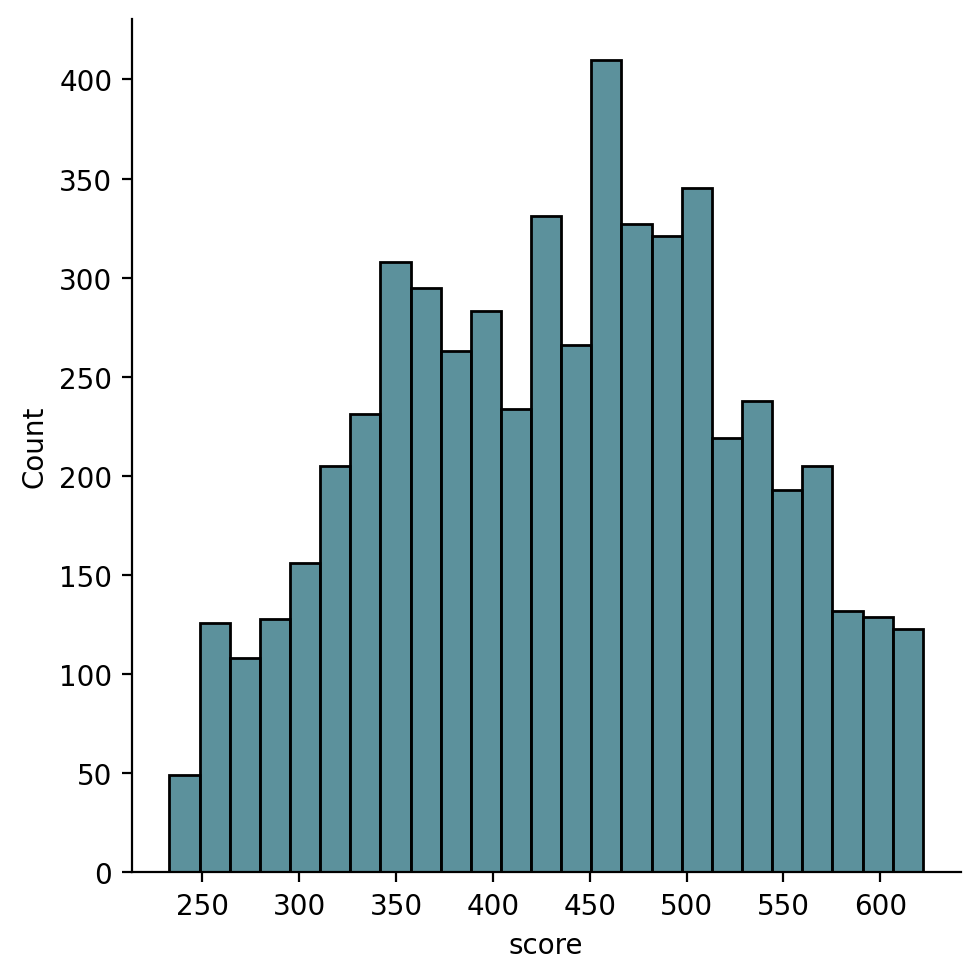

In [89]:
sns.displot(X_train['score'], color="#256D7B")

In [90]:
pd.set_option("display.max_rows",200)
scorecard[['característica', 'valor','atributo','puntos']].sort_values(['característica','atributo']).reset_index(drop=True)

,característica,valor,atributo,puntos
0,w_Dependents,-0.23,No,24.00
1,w_Dependents,0.68,Yes,37.00
2,w_DeviceProtection,-0.57,No,24.00
3,w_DeviceProtection,1.51,No internet service,36.00
4,w_DeviceProtection,0.22,Yes,28.00
5,w_InternetService,0.43,DSL,56.00
6,w_InternetService,-0.69,Fiber optic,-18.00
7,w_InternetService,1.51,No,126.00
8,w_OnlineBackup,-0.61,No,21.00
9,w_OnlineBackup,1.51,No internet service,42.00


In [92]:
df_aux = X_test.merge(y_test, on=um, how='left')
df_aux['r_score'] = pd.cut(df_aux['score'],bins=11,include_lowest=True, ordered=True).astype(str)
aux     = df_aux[['r_score','Churn']].copy()
aux['n']= 1
aux = aux.pivot_table(index='r_score',columns='Churn',values='n',aggfunc='sum')
aux.to_excel('datasets/creditscoring/SCORE.xlsx')
aux = aux.reset_index()
aux

Churn,r_score,0,1
0,"(235.613, 271.091]",10,52
1,"(271.091, 306.182]",22,40
2,"(306.182, 341.273]",39,65
3,"(341.273, 376.364]",89,77
4,"(376.364, 411.455]",125,55
5,"(411.455, 446.545]",129,34
6,"(446.545, 481.636]",174,27
7,"(481.636, 516.727]",158,11
8,"(516.727, 551.818]",123,5
9,"(551.818, 586.909]",101,4


In [93]:
aux["TB"] = aux[0]/(aux[0]+aux[1])*100
aux["TM"] = aux[1]/(aux[0]+aux[1])*100
aux["odds"] = np.where(aux[0]!=0, aux[1]/aux[0], np.nan)
aux["AcumB"] = aux[0].cumsum()
aux["AcumM"] = aux[1].cumsum()
aux["%AB"] = (aux["AcumB"]/aux[0].sum())*100
aux["%AM"] = (aux["AcumM"]/aux[1].sum())*100
aux

Churn,r_score,0,1,TB,TM,odds,AcumB,AcumM,%AB,%AM
0,"(235.613, 271.091]",10,52,16.13,83.87,5.20,10,52,0.97,14.02
1,"(271.091, 306.182]",22,40,35.48,64.52,1.82,32,92,3.09,24.80
2,"(306.182, 341.273]",39,65,37.50,62.50,1.67,71,157,6.85,42.32
3,"(341.273, 376.364]",89,77,53.61,46.39,0.87,160,234,15.44,63.07
4,"(376.364, 411.455]",125,55,69.44,30.56,0.44,285,289,27.51,77.90
5,"(411.455, 446.545]",129,34,79.14,20.86,0.26,414,323,39.96,87.06
6,"(446.545, 481.636]",174,27,86.57,13.43,0.16,588,350,56.76,94.34
7,"(481.636, 516.727]",158,11,93.49,6.51,0.07,746,361,72.01,97.30
8,"(516.727, 551.818]",123,5,96.09,3.91,0.04,869,366,83.88,98.65
9,"(551.818, 586.909]",101,4,96.19,3.81,0.04,970,370,93.63,99.73


In [94]:
aux.to_excel('datasets/creditscoring/SCORE.xlsx')

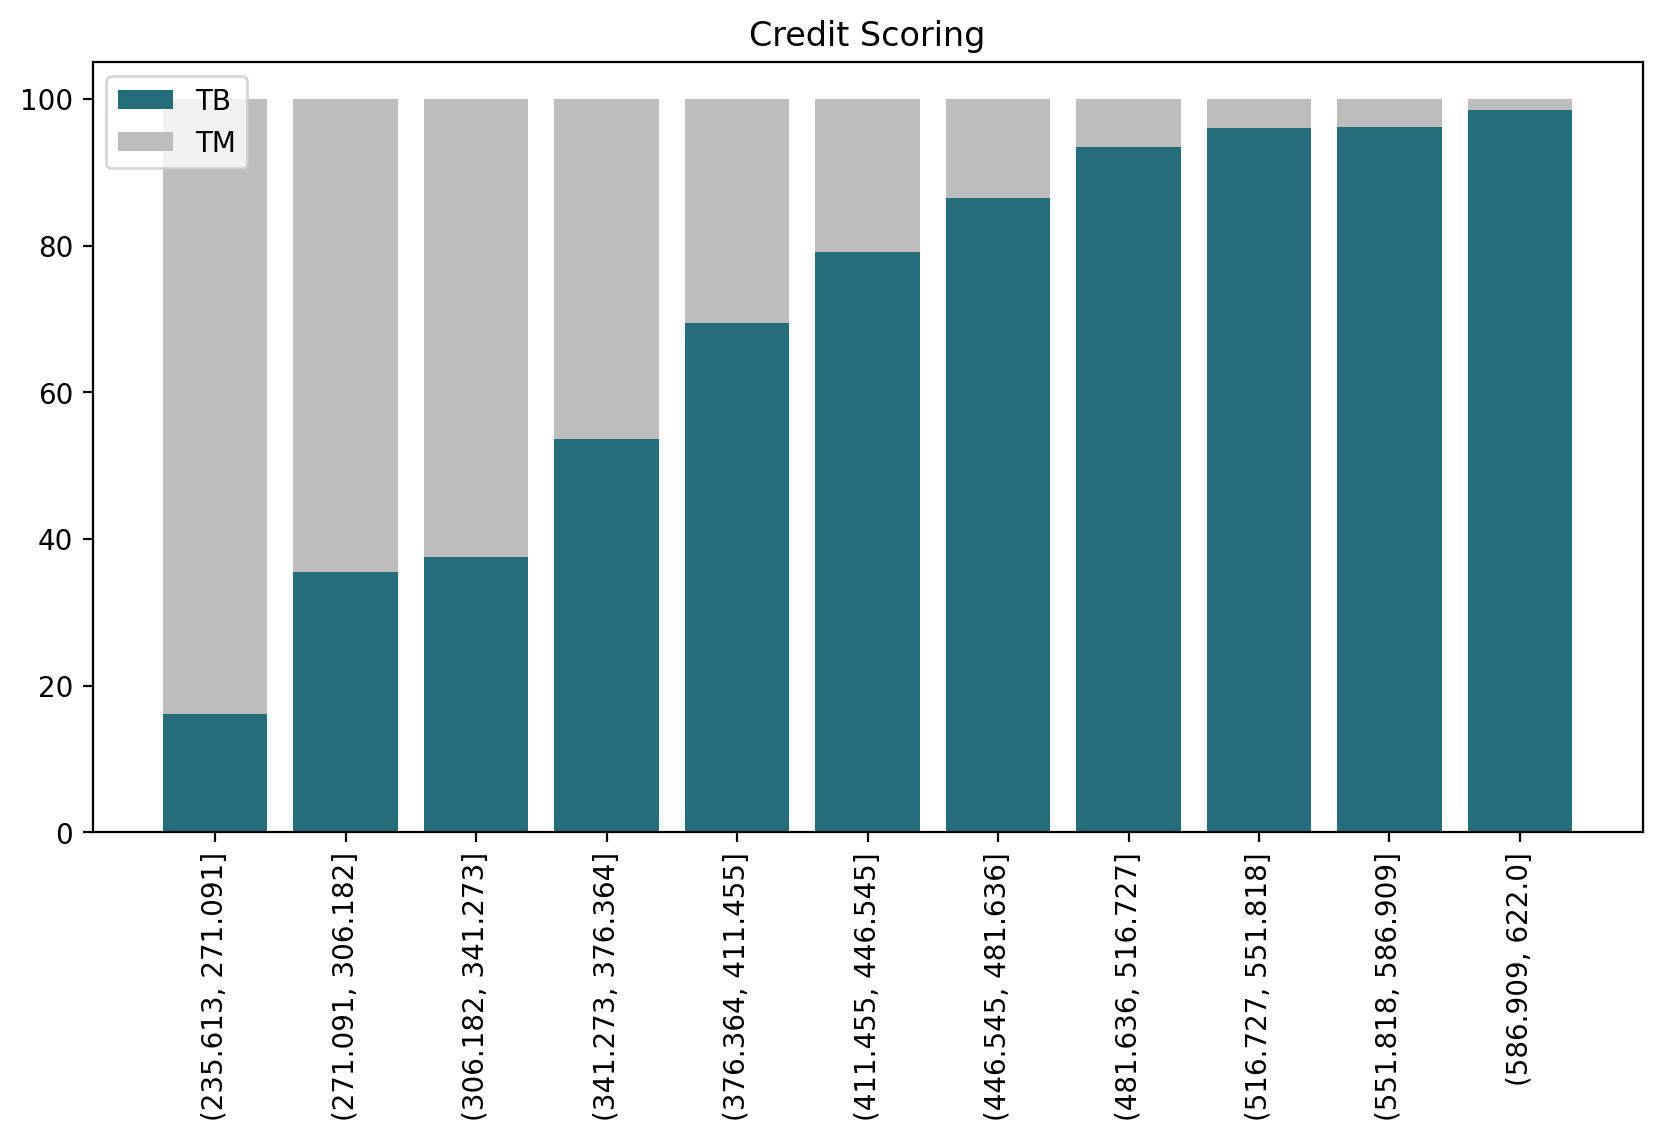

In [117]:
plt.figure(figsize=(10,5))
plt.bar(x="r_score", height="TB", data=aux, color="#256D7B")#verde
plt.bar(x="r_score", height="TM", data=aux, bottom="TB", color="#bdbdbd") #gris
plt.xticks(rotation=90)
plt.title("Credit Scoring")
plt.legend(["TB", "TM"])
plt.show()

In [118]:
aux_graph

,%AB,%AM,r_score,0,1,TB,TM,odds,AcumB,AcumM
0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.97,14.02,"(235.613, 271.091]",10.00,52.00,16.13,83.87,5.20,10.00,52.00
2,3.09,24.80,"(271.091, 306.182]",22.00,40.00,35.48,64.52,1.82,32.00,92.00
3,6.85,42.32,"(306.182, 341.273]",39.00,65.00,37.50,62.50,1.67,71.00,157.00
4,15.44,63.07,"(341.273, 376.364]",89.00,77.00,53.61,46.39,0.87,160.00,234.00
5,27.51,77.90,"(376.364, 411.455]",125.00,55.00,69.44,30.56,0.44,285.00,289.00
6,39.96,87.06,"(411.455, 446.545]",129.00,34.00,79.14,20.86,0.26,414.00,323.00
7,56.76,94.34,"(446.545, 481.636]",174.00,27.00,86.57,13.43,0.16,588.00,350.00
8,72.01,97.30,"(481.636, 516.727]",158.00,11.00,93.49,6.51,0.07,746.00,361.00
9,83.88,98.65,"(516.727, 551.818]",123.00,5.00,96.09,3.91,0.04,869.00,366.00


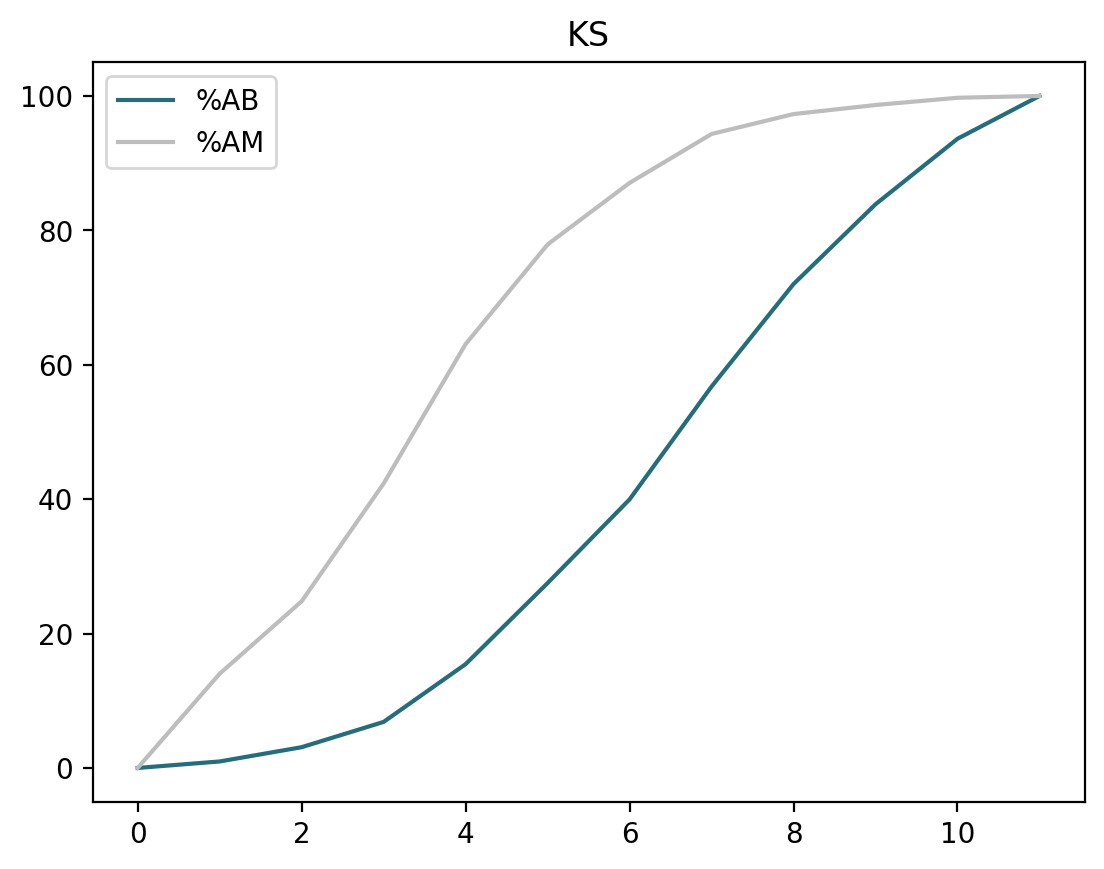

In [ ]:
aux_graph = pd.concat([pd.DataFrame({"%AB":[0], "%AM":[0]}), aux], axis=0).reset_index(drop=True)
plt.plot(aux_graph["%AB"], color="#256D7B") # verde
plt.plot(aux_graph["%AM"], color="#bdbdbd") # gris
plt.legend(["%AB", "%AM"])
plt.title("KS")
plt.show()

In [263]:
user_547 = pd.DataFrame(X_train.iloc[547]).T
cols_score = pd.DataFrame(X_train.iloc[547].filter(like='pts_')).T.columns.tolist()
user_547 = user_547[ cols_score]
user_547

,pts_w_d_tenure_5,pts_w_OnlineSecurity,pts_w_TechSupport,pts_w_InternetService,pts_w_OnlineBackup,pts_w_DeviceProtection,pts_w_PaymentMethod,pts_w_StreamingMovies,pts_w_StreamingTV,pts_w_d_MonthlyCharges_4,pts_w_d_TotalCharges_5,pts_w_PaperlessBilling,pts_w_Dependents,pts_w_Partner,pts_w_SeniorCitizen
1843,101.00,51.00,53.00,126.00,42.00,36.00,39.00,-6.00,-6.00,14.00,34.00,42.00,37.00,29.00,30.00


In [286]:
user_547.T.reset_index().rename(columns={'index':'variable',1843:'pts'})

,variable,pts
0,pts_w_d_tenure_5,101.00
1,pts_w_OnlineSecurity,51.00
2,pts_w_TechSupport,53.00
3,pts_w_InternetService,126.00
4,pts_w_OnlineBackup,42.00
5,pts_w_DeviceProtection,36.00
6,pts_w_PaymentMethod,39.00
7,pts_w_StreamingMovies,-6.00
8,pts_w_StreamingTV,-6.00
9,pts_w_d_MonthlyCharges_4,14.00
